# Credit Card Churn Prediction - Complete EDA - Modelling
[Daniel Beltrán](https://www.linkedin.com/in/danielbeltranpardo/) - Apr 2021

----------
Motivation:
This notebook pretends to be a basic guide for doing a good Data Science focusing on the: Exploratory Data Analysis(EDA) and later on the modelling. Lately I'm working within the marketing enviroment in the financial sector so this datasets adapts really good to my needs, hope you find good quality of data science process, code and analysis. 

Also as a personal challenge I will use Plotly for the visualization as much as I can (normally I use matplotlib/seaborn).

----------

# Introduction

Nowadays the good use of data is constantly deciding whether a business catches up with the market or slips farther behind. Grasp a good understanding of the data combined with business goal and a deep understanding has the potential to allow companies to make choices that keep them ahead of the competition. 

On top of that, every day it becomes clearer that data processing and interpretation have immense value—and this is where a data scientist comes into play. While most executives are aware that data science is a glamorous industry and that data scientists are modern-day superheroes, many businesses still struggle to identify how to use analytics to take advantage of their data. 

To address the misuse there have appear multiple project framework like SAP DMAIC (Define, Measure, Analyze, Improve and Control), Microsoft Team Data Science Process (TDSP), The 7 Steps of Machine Learning by Google and even Universal Workflow of Machine Learning from François Chollet (Keras creator). Following these frameworks we conclude that on a high level scope the correct approach  to develop a project should be:
1. Define a problem: Why is this important? What you want to accomplished? 
2. Business understanding: What metrics would be use to determine the success of the project? Where are the main data sources that you need to access/obtain?
3. Data Adquisition & Understading: How is the quality of the data? How is the data related to the target variables? to the rest of variables? How can you refresh and score the data regularly?
4. Modelling: What solution would you propose? What is the optimal data features for the machine-learning model? Is the solution suitable for production? What are the most prominent ethical concerns? 
5. Deployment: How would you deploy the model? How would you operationalize the model for other applications to consume? 
6. Monitoring: How would you understand the changes that affect the system? How would you periodically retrain model to prevent model staleness? 

In this notebook we will focus mainly (but not exhaustively) on the third and fourth point and we will infere the first and second, but please note that every step is critical to address the success of a machine learning problem.

**_Let's begin!_**

# Machine Learning project 
### Defining a problem 

What we want with this excercise is to identify correctly if a user will churn or not, this could be because:
> It costs on average around 200 USD to acquire a credit card customer in the US (up to and beyond 1,000 USD if they are affluent cards like MasterCard World Elite and Visa Infinite)" [Source 2020: here](https://medium.com/unifimoney/changing-the-vicious-cycle-of-push-to-pull-in-customer-acquisition-6218c8644000#:~:text=It%20costs%20on%20average%20around,World%20Elite%20and%20Visa%20Infinite)<hr>
> The Apple Card doesn’t need any affiliates or marketing yet analysts say that this new card has a customer acquisition cost of 350 USD and will take several years for Goldman Sachs to turn a profit on it. [Source 2019: here](https://runningwithmiles.boardingarea.com/apple-card-customer-acquisition-cost/)

That being said, it actually takes banks a few years to recover the acquisition investment of that customer and that's why they're motivated to predict which users are the most likely to churn, in order to proactively and not reactively retain the client.

### Business understanding
To define the success of the solution that we will deliver let's define the metrics as: F1 Score, Precision and Recall. This metrics were chosen since normally churn problems are imbalanced, but all depends on the definition of churn and the cost driven by each scenario.

#### Target Variable
We will use the attrition flag that is within the dataset as our target variable, we will train and test with this variable.

### Data Understanding 
#### Why EDA? 
EDA is a fundamental step in the Data Understading Process, it gives a good comprehension about the dataset and turn an almost useable dataset into a completely useable dataset, giving in the process a good perception about the variables available and the relationship between them. 

What we want through this notebook is to understand which users are in risk of churn and how is the behaviour of the user that previously churned, this knowledge will help us later to build a robust model. To adress this we will follow the next steps:
* <b>Univariable study</b>. We will just focus on the dependent variable ('Attrition_Flag') and try to know a little bit more about it, this will help us guiding the modelling. We will also explore the other variables to get an understanding about 
* <b>Multivariate study</b>. We will try to understand how the dependent variable and independent variables relate.
* <b>Basic cleaning</b>. We will clean the dataset and handle the missing data, outliers and categorical variables.
* <b>Test assumptions</b>. We will check if our data meets the assumptions required by most multivariate techniques.

In [ ]:
# Import packages needed

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns

#Stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import f_classif, mutual_info_classif, chi2
from sklearn.preprocessing import PowerTransformer

#Data Processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, OneHotEncoder, PowerTransformer, LabelEncoder, StandardScaler
from sklearn.base import BaseEstimator,TransformerMixin
from collections import defaultdict
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

#Model 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipe
from sklearn.metrics import f1_score, recall_score, precision_score

#Config
pd.pandas.set_option('display.max_columns', None)

# Exploratory Data Analysis (EDA)
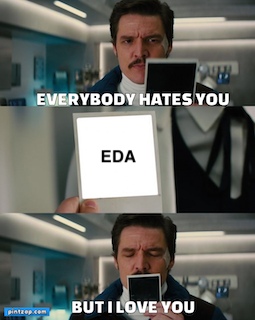



First thing first, let's load the data!

In [ ]:
df = pd.read_csv('/kaggle/input/credit-card-customers/BankChurners.csv')
df.head()

Drop of the last 2 columns as suggested in the data description

In [ ]:
df = df.drop(columns= ['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])

## Dataset general information 

The first thing we want to do is to answer:
* What is the shape of the dataset?
* How many columns (features) are?
* What are the type of features?

In [ ]:
o_shape = df.shape
print(f'Data shape: {o_shape} \n')
print(f'Information of data columns:{df.info()} \n')

From this we can get the sense of the  total data set, we got around 10K samples and a total of 21 columns most of the numerical and a few categorical. Also, we can see that the data set has no missing values (all the features got the same non-null values as the total samples).

Now that we identify the the general dataset we get a better understanding of the dataset describing each variable, the description for this dataset identify the variables as the following, keep in mind that with this excercise we want to predict which user will churn.  

### Feature information
* CLIENTNUM: Client number. Unique identifier for the customer holding the account

* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then 1(Attrited Customer) else 0(Existing Customer)

* Customer_Age: Demographic variable - Customer's Age in Years

* Gender: Demographic variable - M=Male, F=Female

* Dependent_count: Demographic variable - Number of dependents

* Education_Level: Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)

* Marital_Status: Demographic variable - Married, Single, Divorced, Unknown

* Income_Category: Demographic variable - Annual Income Category of the account holder (<  40𝐾, 40K - 60K,  60𝐾− 80K,  80𝐾− 120K,> \$ 120K, Unknown)

* Card_Category: Product Variable - Type of Card (Blue, Silver, Gold, Platinum)

* Months_on_book: Period of relationship with bank

* Total_Relationship_Count: Total no. of products held by the customer

* Months_Inactive_12_mon: No. of months inactive in the last 12 months

* Contacts_Count_12_mon: No. of Contacts in the last 12 months

* Credit_Limit: Credit Limit on the Credit Card

* Total_Revolving_Bal: Total Revolving Balance on the Credit Card

* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)

* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)

* Total_Trans_Amt: Total Transaction Amount (Last 12 months)

* Total_Trans_Ct: Total Transaction Count (Last 12 months)

* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)

* Avg_Utilization_Ratio: Average Card Utilization Ratio

### Train and Out of sample population
As a rule, our objective is to produce models that will perform well not only on training data, but moreover on unseen information. Hence, we need to maintain a strategic distance from models that capture the peculiarities of the information we have accessible presently and avoid overfitting.

Being said so, we first want to split between our train and test sets,this will help as we said for not introducing any bias in the model later on.
* The train set purpose is that the model observes and learns from this data and optimize its parameters.
* The test set, provide an unbiased evaluation of a final model fit on the training dataset. It will be used only once the model is completely trained

In [ ]:
df, df_test = train_test_split(df, test_size=0.2, random_state=42)

# Univariate study

Before we want to start checking the relationship between variables we are going to explore a single variable at a time, with the Univariate study we want to summarize the variable and help us better understand the data, answering:
* How many unique values are per column?
* Is there any column in which duplicates doesn't make sense? In this case we will specifically look the CLIENTNUM column.
* How many nulls are per column? For this dataset we can see that previously none of the variables contain null values.
* How is the central tendency (mean, median, mode) for each numerical variable?
* What are the labels (frequency of each category) composition for each categorical variables? 

In [ ]:
pd.concat([df.nunique(), df.dtypes], axis= 1).rename(columns={0:'Unique_Values',1:'Data_Type'}).sort_values('Unique_Values')

There seems to be no nulls for the CLIENTNUM, then we're going to drop the columns since it doesn't add any value.
For the categorical columns there are less than 10 labels, which is good we don't want granular frequencies, Attrition also just contains 2 values.

For the numerical values the variables: Total_Relationship_Count, Dependent_count, Months_Inactive_12_mon and Contacts_Count_12_mon there few categories as expected for the rest of variables we will how is the central tendency.

In [ ]:
df  = df.drop(columns=['CLIENTNUM'])

In [ ]:
df.describe().apply(lambda s: s.apply('{0:.2f}'.format))

* The customer age mean is ~46 this means that the **data isn't from a Neobank and seems to be more a traditional bank**, also the min Customer Age is 26 which is good (there isn't any underage data) and the max Age is 70 which is a rational number.
* Dependent count is between 0 and 5 with a mean of 2.3, which seems fine.
* Months on book the min is 13 and max is 56, this indicates that the **data is for at least a 13 month old customers (aprox > 1 y.o.). This means that the model will be good predicting for customers that are at least 13 months old but not necessarily good for < 1 y.o. customers. or long term customers > 5 years.** 
* The least Relationship_count is 1, which seems fine at least 1 product customers. For the max product that a user got is 6, we will check if there is a relationship between the total relationship and the churn, _hypothetically users that aquire more products are less likely to churn._
* Months inactive the least value is 0 the most is 6. _Hypothetically when a user get more inactive will be most likely to churn._
* Contacts_Count_12_mon the are users which haven't had any contact and some users that have had 6 contacts, _the more the contacts could be that there is something wrong with the product (something not functioning properly) hence they will be more likely to churn._
* The Credit_Limit seem to have some outliers in the right side, maybe is a particular client with a really good credit line.
* The revolving balance there are some users which have 0 (they're not using the CC) and the most is using 2517 which seem to be _the amount revolved at the end of month is really low compared to credit line available_, we will later on analyze more this information. 
* The Avg_Open_To_Buy indicates the amount of credit available at a given time in this case we can se that the min is 3 someone got nearly all the credit line full and the max is the same as the max of the CL.
* The Total_Amt_Chng_Q4_Q1 seem to be a percentage of the change for the transactions, **the mean is below 1 which indicates that people transact less in Q1 than Q4** this could be because at the EoY people use more the CC in the holidays.
* Total_Trans_Amt indicates that 4.4K is the mean for the year approx 300 per month also there is a max value of 18K which seem to be an outlier. _Hypothetically the users that transact more shouldn't be churning unless there is sometype of incentive for a portfolio purchase services with discount from another financial institution or a bad user experience._
* Total_Trans_Ct on average there are 65 tx, approx 5.4 per month. The max value is 139 more than the double of the mean, indicanting a posible outlier. _The more the transaction could indicate that they are users less likely to churn._
* Total_Ct_Chng_Q4_Q1 seem to have a similar behaviour from the total amount changed.
* Avg. Utilization of the CL is 0.27 but the median is 0.18 which could indicate a positive skew, also there seem to be outliers on the left side. **The percentile 25 is 0.02 indicates that 25% are hardly using the product.**

Another good way to understand this information is to see Violin Plots, these let you combine a histograms and box plot in a visual. 

In [ ]:
df_numeric = df.select_dtypes(include='number')

def variable_remove_underline(name):
    """Remove the underline for a string 

    Parameters
    ----------
    name : str
        The string which contains the underline to be removed

    Returns
    -------
    str
        a string with none underline
    """
    return name.replace('_',' ')

def create_plotly_graph_object(dataframe, fig, type_char, params, dataframe2):
    """Create each trace for a the 2 grid plotly graph according to the type of char for all the columns in a dataframe

    Parameters
    ----------
    dataframe : pd.Dataframe
        The dataframe 
    fig : plotly.graph_objs._figure.Figure
        A figure with the grid 
    type_char : plotly.graph_objs._
        A graph object from plotly it could be go.Violin, go.Histogram 

    Returns
    -------
    None
    """
    if dataframe2 is None:
        for num, col in enumerate(dataframe):
            params['name'] = variable_remove_underline(col)
            params['y'] = dataframe[col]
            fig.add_trace(type_char(params),
                                    row=(num//2)+1, col=(num%2)+1)
    else:
        for num, col in enumerate(dataframe):
            fig.append_trace(type_char(y= dataframe[col],
                                       name = col + '_Att',
                                      marker=dict(color='red')),
                                    row=(num//2)+1, col=(num%2)+1)
            fig.append_trace(type_char(y= dataframe2[col],
                                       name = col + '_Non-Att',
                                      marker=dict(color='blue')),
                                    row=(num//2)+1, col=(num%2)+1)
        

def make_2_col_grid(dataframe, type_char, params={}, dataframe2=None):
    """Create a 2 grid plotly graph according to the type of char for all the columns in a dataframe

    Parameters
    ----------
    dataframe : pd.Dataframe
        The dataframe 
    type_char : plotly.graph_objs._
        A graph object from plotly it could be go.Violin, go.Histogram 

    Returns
    -------
    None
    """
    num_rows = dataframe.shape[1]
    total_rows = num_rows//2+num_rows%2
    fig = make_subplots(rows=total_rows, cols=2)
    fig.update_layout(
        autosize=False,
        width=1000,
        height=400*total_rows,
        margin=dict(
            l=50,
            r=50,
            b=100,
            t=100,
            pad=4
        ),
        yaxis=dict(tickformat=",.2f"),
        xaxis=dict(tickformat=",.2f"),
        paper_bgcolor="LightSteelBlue",)
    create_plotly_graph_object(dataframe, fig, type_char, params, dataframe2)
    fig.show()

In [ ]:
params_violin = {'box_visible':True, 
                 'meanline_visible':True,
                 'opacity':0.6,
                'hovertemplate': 'y:%{y:20,.2f}'}

make_2_col_grid(df_numeric, go.Violin, params_violin)

As you can see there are some variables like Dependent count, Total Relationship Count, Months in book, Months Inactive, Contact Count that are numerical but not continous, therefore we will classify them as categorical in an ordinal way (categorical variables that do have an order).

Now we will analyze the rest of variables:

In [ ]:
for col in df.select_dtypes(include='O'):
    print(df[col].value_counts(normalize=True).apply('{0:.3f}'.format), '\n')

* **Attrition flag distribution as the description said is imbalanced.** To clarify an imbalanced classification problem is one in which the distribution of examples across known groups is distorted or biased. The distribution can range from a small skew to an extreme disparity, with one example in the minority class for hundreds, thousands, or millions in the majority class.
* Gender seem to be a balanced column, indicating good Credit Line Assignment practices.
* In the Education Level most of frequencies are balanced except for Doctorade and Post-graduates. However **there is an unknown label**, for now we will leave it as it's. Maybe these are users that don't want to update their personal information and they're most likely to churn. 
* In the Maritial_Status most of the users are either Married (43%) or Single (39%), _indicating a low rate of divorce in the country._ **There appears again the unknown label.**
* In the income category ~52% of the users earn below the 60K. **And there is also an unknown label**
* In the card category most of the users got the Blue Category, this means the bank is risk conservative.

In [ ]:
new_cat = {'Dependent_count':'object',
             'Total_Relationship_Count':'object',
             'Months_Inactive_12_mon':'object',
             'Contacts_Count_12_mon':'object'}

for key, value in new_cat.items():
    df[key] = df[key].astype(value)

In [ ]:
df_cat = df.select_dtypes(include='O')
params_hist = {'histnorm':'percent',
              'legendgroup':True,}
make_2_col_grid(df_cat, go.Histogram, params_hist)

We will transform the Attrition flag from a categorical to a numerical data type, this will help us with the first multivariate studies. For the users that were attrited we will use the 1, and for the existing custumers we will use 0. Later on we want to predict which user were Attrited according to the rest of the variables. Also we want to explore how is the relationship between Attrited and Existing customers 

In [ ]:
df['Attrition_Flag'].value_counts(normalize = True, dropna = False)
df['Attrition_Flag'].replace({'Existing Customer': 0, 'Attrited Customer': 1}, inplace=True)

# Multivariate study


### Numerical variables
Let's check the relationship of two variables concerning each other. This is done because it helps us to detect anomalies, understand de dependance of two variables on each other, the impact of each varaible within the target variable (giving us really good insights)

In [ ]:
def create_corr_heatmap(method_tittle, df):
    '''
    '''
    customc=[[0.0, '#FEC5BB'],
             [0.5,'white'],
             [1.0, '#FD9235']]
    
    corr_val = [[corr.iloc[i][j] if i>j else None for j,row in enumerate(df)] for i, col in enumerate(df)]
    hovertext = [[f'corr({col}, {row})= {corr.iloc[i][j]:.3f}' if i>j else '' for j,row in enumerate(df)] for i, col in enumerate(df)]
    
    heat = go.Heatmap(z=corr_val,
                  x=list(corr.index),
                  y=list(corr.columns),
                  xgap=1, ygap=1,
                  colorscale= customc,
                  colorbar_thickness=20,
                  colorbar_ticklen=3,
                    hovertext =hovertext,
                  hoverinfo='text',
                      zmin=-1, 
                      zmax=1
                   )
    
    title = method_tittle + ' Correlation Matrix'
    
    layout = go.Layout(title_text=title, title_x=0.5, 
                   width=600, height=600,
                   xaxis_showgrid=False,
                   yaxis_showgrid=False,
                   yaxis_autorange='reversed')
    
    fig=go.Figure(data=[heat], layout=layout)        
    fig.show() 

In [ ]:
df_numeric = df.select_dtypes(include='number')
corr = df.select_dtypes(include='number').corr()
create_corr_heatmap('Pearson', corr)

From the heatmap above we can conclude:
* Attrition flag got a correlation with the: Avg_Utilization_Ratio, Total_CT_Chang_Q4_Q1, Total_Trans_Amt, Total_Amt_Chang_Q4_Q1, Total_Revolving_Bal. Let's remember that causation and correlation can exist at the same time, however correlation doesn't mean causation.
* There are some variables like Avg_Utilization_Ratio & Credit_Limit , Credit_Limit & Avg_Open_To_Buy, Months_on_book & Customer_Age, and others that are highly correlated. This could be an issue since it can indicate multicollinearity, specially if we later on want to use based models (i.e. Linear Regression, SVM) in which the results and stability of the models and for extracting the feature importance.

In [ ]:
att = df_numeric[df_numeric['Attrition_Flag']==1].drop(columns=['Attrition_Flag'])
n_att = df_numeric[df_numeric['Attrition_Flag']==0].drop(columns=['Attrition_Flag'])
make_2_col_grid(att, go.Box, _, n_att)

From this box plot matrix for each continous variable, there seem to be differences between Attrited vs Non-Attrited, for the following variables: Avg_Utilization, Total_Trans_ct, Total_Trans_Amount, Total_revolving_bal.

In [ ]:
list_dim = [dict(label = i, values = df[i]) for i in df_numeric]
textd = ['Attrited Customer' if at==1 else 'Non-Attrited Customer' for at in df_numeric['Attrition_Flag']]


fig = go.Figure(data=go.Splom(
                dimensions=list_dim,
                diagonal=dict(visible=False),
                text=textd,
                showupperhalf = False,
                legendgroup=True,
                marker=dict(color=df_numeric['Attrition_Flag'],
                              size=2.5,
                              colorscale='Bluered',
                              line=dict(width=0.5,
                                        color='rgb(230,230,230)'))))

title = "Scatterplot between all numeric variables"
fig.update_layout(title={'text': title,
                        'xanchor': 'left',
                        'yanchor': 'top',
                        'font_size':30},
                  dragmode='select',
                  width=1500,
                  height=1500,
                  hovermode='closest',
                 font=dict(size=8))
                

fig.show()

With this Scatterplot matrix we want to visualize if there are any relationship that help us to explain the attrition flag. As you can see most of them is really difficult to differentiate between clearly any boundary where we can split Attrited and Non Attrited users, however, there are some in particular like Avg Utilization Ratio and Total_Ct_Chang_Q4_Q1, Total_Ct_Chang_Q4_Q1 and Total_Trans_Ct, Total_Trans_Ct and Total_Trans_Amount and many more. In general we can see Total_Ct_Chang_Q4_Q1, Total_Trans_Ct, Total_Trans_Amount seem to be the best variable to difference users.




Now let's check for our categorical variables 

### Categorical variables

In [ ]:
def create_cat_df_stack(dataframe, target):
    df_cat = dataframe.select_dtypes(include='O')
    df_cat = pd.concat([df_cat,dataframe[target]], axis=1)
    return df_cat

def create_cat_stacked_bars(dataframe, fig, target, target_map):
    for num, col in enumerate(dataframe):
        if col == target:
            pass
        else: 
            df_stack=df_cat.groupby([target,col]).size().reset_index()
            df_stack.columns= [target, col, 'Counts']
            df_stack['Percentage'] = df.groupby([target,col]).size().groupby(level=0).apply(lambda x: x/float(x.sum())).values
            if target_map is not None:
                df_stack[target].replace(target_map, inplace=True)

            trace = go.Figure(data = [go.Bar(x=label_df.Attrition_Flag, 
                                                     y=label_df.Percentage, 
                                                     name=label) 
                                                     for label, label_df in df_stack.groupby(col)])
            row=(num//2)+1
            col=(num%2)+1
            for i in trace['data']:
                fig.add_trace(i,row,col)


def create_stacked_grid(dataframe_complete, target, target_map=None):
    dataframe = create_cat_df_stack(dataframe_complete, target)
    num_rows = dataframe.shape[1]-1
    total_rows = num_rows//2+num_rows%2
    
    names_fig = list(dataframe.columns)
    names_fig = names_fig[:-1]
    
    fig = make_subplots(rows=total_rows, cols=2, subplot_titles= names_fig)
    fig.update_layout(autosize=False,
                        width=1000,
                        height=400*total_rows,
                        margin=dict(l=50,
                                  r=50,
                                  b=100,
                                  t=100,
                                  pad=4),
                        paper_bgcolor="LightSteelBlue",
                        barmode="stack",
                        showlegend=False,
                        title = target + ' vs categoricals',)
    
    for row in range(total_rows):
        fig.update_yaxes(title_text="Percentage", tickformat=",.0%", row=row, col=1)
        fig.update_yaxes(title_text="Percentage", tickformat=",.0%", row=row, col=2)
        
    create_cat_stacked_bars(dataframe,fig, target, target_map)
    fig.show()

In [ ]:
target_map = {0:'Existing Customer', 1: 'Attrited Customer'}
create_stacked_grid(df, 'Attrition_Flag', target_map)

We used here a stack bar to compare the relationship between the Existing and Attrited users for each categorical variable.  

It appears to be that there isn't a notable difference with most of the socialdemographic variables (Dependent_count, Education_Level, Marital_Status) there isn't also a notable difference with the financial variables (income_category, card_category). However the varaibles that describe a relationship with the bank there is clearly a difference between Existing and Attrited users, as the following:
* When the user got less products (relationship), they are more likely to churn.
* When the user is inactive for longer periods of time, they are more likely to churn.
* When the user had have more contacts in the last 12 months, they are more likely to churn.
* The gender variable seem to have a slight skew for the males being the ones that are the attrited.

For the demographic where we got some unknowns there seem to no difference between the distributions, hence we can safetly drop the records where there are unknowns and not introduce any bias, for now we will not drop them but later on we got the option to safetly drop.

In [ ]:
categories=[['Unknown','Uneducated', 'High School', 'College','Graduate','Post-Graduate', 'Doctorate'],
           ['Unknown', 'Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +'],
           ['Blue','Silver','Gold','Platinum']]

categorical_ordinal_cat = ['Education_Level','Income_Category','Card_Category']
categorical_ordinal = ['Dependent_count','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon']

df_target = df['Attrition_Flag'].reset_index(drop=True)

df_cat_ord = df[categorical_ordinal]
enc_1 = OrdinalEncoder()
enc_1.fit(df[categorical_ordinal])
df_cat_ord = pd.DataFrame(columns= df[categorical_ordinal].columns,
                          data = enc_1.transform(df[categorical_ordinal]))

enc_2 = OrdinalEncoder(categories=categories)
enc_2.fit(df[categorical_ordinal_cat])
df_cat_enc = pd.DataFrame(columns= df[categorical_ordinal_cat].columns,
                          data = enc_2.transform(df[categorical_ordinal_cat]))


df_cat_enc = pd.concat([df_cat_enc, df_cat_ord], axis = 1) 
df_cat_enc = pd.concat([df_target,df_cat_enc], axis = 1) 

In [ ]:
corr = df_cat_enc.corr(method='spearman')
create_corr_heatmap('Spearman', corr)

According to the previous Spearman correlation matrix there isn't any correlation between the variables. With the target variable there is a correlation for the Contacts_Counts_12_mon, Months_Inactive_12_mon and slighly on the Total_relationship_count.
Since there isn't any correlation

# Hyphotesis  

So far from the EDA we achieved to: 
- Grasp an understanding about the type of bank and they users.
- Know that the dataset is imbalanced
- Identify some high correlations inbetween some variables, maybe multicolinearity. 
- Formulate hyphotesis about some variables performing better than others (helping to classifying correctly Attrited vs Current users). 

How to deal with some situations we got in this dataset: 
- To deal with he imbalanced dataset as we stated we will then use metrics different from accuracy, if that isn't enough we can try:
    - Resampling the dataset, this means add copies of instances from the under-represented class called over-sampling or delete instances from the over-represented class, called under-sampling. For our case it's recommended to over-sample since we don't got more > 100K records.
    - Try generate synthetic samples, the most popular of such algorithms is called SMOTE or the Synthetic Minority Over-sampling Technique. SMOTE is an oversampling method. It works by creating synthetic samples from the minor class instead of creating copies.
- Identify if there is any multicolinearity using VIF, ”VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable."
- To correctly prove the hypothesis, we need to do some t-test and Chi-square test, this will help us to statistically identify if there is difference between the means for categorical and numerical variables.

### Identifying multicolinearity
Let's detect Multicoliniarity using VIF, 

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20200709102530/VIF_formula.jpg" width="250">

* VIF starts at 1 and has no upper limit
* VIF = 1, no correlation between the independent variable and the other variables
* VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others

In [ ]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

calc_vif(df_numeric.drop(columns = 'Attrition_Flag'))

The inf for VIF shows a perfect correlation between two independent variables. In this case is a perfect correlation, we get R2 =1, which lead to 1/(1-R2) -> infinity.

According to the results there is multicolinearity present, we will then use **regularization** to deal with it.

### Hypothesis testing
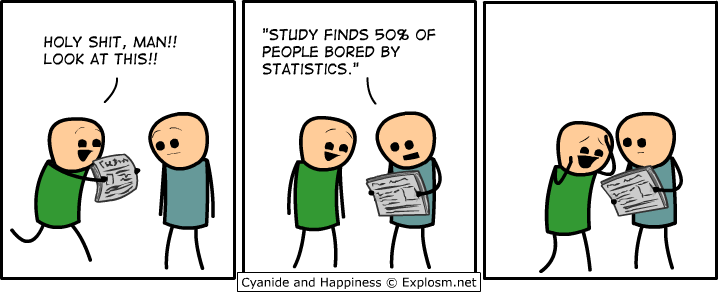

We have made multiple hypthesis now it's the time to test them with the objective to have candidates to later on reduce the variables that aren't augmenting the model, reducing the number of variables will help us to:
- Optimize CPU time, ram, memory, etc. 
- Avoid multicollinearity.
- Sometimes after certain point, the performance of the model will decrease with the increasing number of elements as it will start overfitting.
- It will be easier to explain why you model is predicting what is predicting (Ethical AI).
- Less features also help to monitor less things after deploy (Yes... monitoring is really important).

That being said let's explore for our categorical and numerical variables the hyphotesis that we have made so far:

#### Categorical 
When we want to compare the difference between means we can conduct a Chi-Square Test which determines whether there is a **statistically** significant relationship between categorical variables. We want to select the variables which are not independent from the target variable. For this test we define the hypothesis as the following:
* Null Hypothesis (H0): Two variables are independent.
* Alternate Hypothesis (H1): Two variables are not independent.

We will add the variables that we mentioned earlier and include some other to control that we effectively read correctly the previous graphs.

In [ ]:
test_cat_cols = ['Gender',
                'Total_Relationship_Count',
                'Months_Inactive_12_mon',
                'Contacts_Count_12_mon',
                'Card_Category',
                'Dependent_count']

df_cat_test = df[test_cat_cols]

label_dict = defaultdict(LabelEncoder)
df_cat_test = df_cat_test.apply(lambda x: label_dict[x.name].fit_transform(x))

chi_scores = chi2(df_cat_test, df['Attrition_Flag'])
print(chi_scores[1])
results = pd.DataFrame(data = [chi_scores[1],
            ['Accepted H0' if i >= 0.05 else 'Rejected H0' for i in chi_scores[1] ]],
             index = ['P-value','Result'],
            columns = df_cat_test.columns).transpose()

As we can see the p-value for the variables that we mention earlier is very close to 0 (is not zero as you can see in the printed values) and for our other variables is > 0.05 which means that we cannot reject the null hypothesis. 

#### Numerical
We will use a One-way ANOVA for comparing means of two or more samples using statistical significance, this will give us an insight about what are the best variables for classyfing. Let's remember that on an One-way ANOVA the test is the following:
* Null Hypothesis (H0): $\mu_{1} = \mu_{2}$
* Alternate Hypothesis (H1): $\mu_{1} \neq \mu_{2}$

One of the challengues we got for using the ANOVA is that the assumptions that the data is normally distributed, for that we will need to remove the outliers and try to achieve a Gaussian distribution. 

In [ ]:
class OutlierRemover(BaseEstimator,TransformerMixin):
    def __init__(self,factor=1.5, only_max=False):
        self.factor = factor
        self.only_max = only_max
        self.saved_params = {}
        
    def outlier_removal_fit(self,X,y=None):
        X_val = X.values
        q1 = np.quantile(X_val, 0.25)
        q3 = np.quantile(X_val, 0.75)
        iqr = q3 - q1
        lower_bound = q1 - (self.factor * iqr)
        upper_bound = q3 + (self.factor * iqr)
        self.saved_params[X.name] = {'lower_bound': lower_bound,
                                    'upper_bound': upper_bound}
        
    def outlier_removal_transf(self,X,y=None):
        X = pd.Series(X).copy()
        upper_bound = self.saved_params[X.name]['upper_bound']
        lower_bound = self.saved_params[X.name]['lower_bound']
        if self.only_max:
            X.loc[((X > upper_bound))] = np.nan 
        else:
            X.loc[((X < lower_bound) | (X > upper_bound))] = np.nan 
        return pd.Series(X)
    
    def fit(self,X,y=None):
        if X.ndim == 1:
            self.outlier_removal_fit(X)
        else:
            X.apply(self.outlier_removal_fit)
        return self
        
    def transform(self,X,y=None):
        if X.ndim == 1:
            return self.outlier_removal_transf(X)
        else:
            return X.apply(self.outlier_removal_transf)
        
outlier_remover = OutlierRemover()
ol = outlier_remover.fit(df_numeric.drop(columns = 'Attrition_Flag'))
df_without_ol = ol.transform(df_numeric.drop(columns = 'Attrition_Flag'))
df_without_ol['Attrition_Flag'] = df_numeric['Attrition_Flag']
df_without_ol = df_without_ol.dropna()
num_drops = df_numeric.shape[0]-df_without_ol.shape[0]
print(f'Total drops = {num_drops}, {num_drops/df_numeric.shape[0]:.2%} loss')

With the previous function we can identify outliers and later on we can use it for the training/test pipeline. As you can see we dropped almost 25% of our data, which isn't great however we are by no dropping by all columns, if there is any of the columns that doesn't add much value we can drop it and we maybe can have more than 6K cases we got right now. 

In [ ]:
yj = PowerTransformer()
yj.fit(df_without_ol.drop(columns = 'Attrition_Flag'))
df_gauss = pd.DataFrame(data = yj.transform(df_without_ol.drop(columns = 'Attrition_Flag')), 
             columns = df_without_ol.columns[:-1])

In [ ]:
make_2_col_grid(df_gauss, go.Violin, params_violin)

In [ ]:
anova = f_classif(df_gauss,
                  df_without_ol['Attrition_Flag'])
anova = pd.DataFrame(anova, 
                     columns=df_gauss.columns,
                     index = ['Predictive Power(F-score)','p-value'])\
                    .transpose().sort_values('Predictive Power(F-score)', 
                                              ascending=False)
anova['H0_Rejected'] = anova['p-value']<0.05
anova

As we see from this table the variables that could be the best for the model are the same that we named before Total_Trans_Ct, Total_Ct_Change_Q4_Q1 and Total_Revolving_Balance

In [ ]:
anova = f_classif(df_numeric.drop(columns='Attrition_Flag'),
                  df_numeric['Attrition_Flag'])
anova = pd.DataFrame(anova, 
                     columns=df_gauss.columns,
                     index = ['Predictive Power(F-score)','p-value'])\
                    .transpose().sort_values('Predictive Power(F-score)', 
                                              ascending=False)
anova['H0_Rejected'] = anova['p-value']<0.05
anova

Also we want to know how good is the combination between variables for a discrete target variable. To achieve that we will use the Mutual information, this which measures the dependency between the variables. The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances
[Here the paper](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3929353/)

If the result of a variable is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

In [ ]:
pd.DataFrame(data = mutual_info_classif(df_gauss, df_without_ol['Attrition_Flag']), 
             index= df_gauss.columns,
             columns = ['Mutual_Info']).sort_values('Mutual_Info', ascending = False)


In this case, we can see that some of the features have a low score like Customer Age, Credit Limit and Months on Book, and the best varaibles are Trans_Amt, Trans_Ct and Total_Ct_Chang_Q4. This make sense with previous analysis that we have done to data.

## Feature Engineering

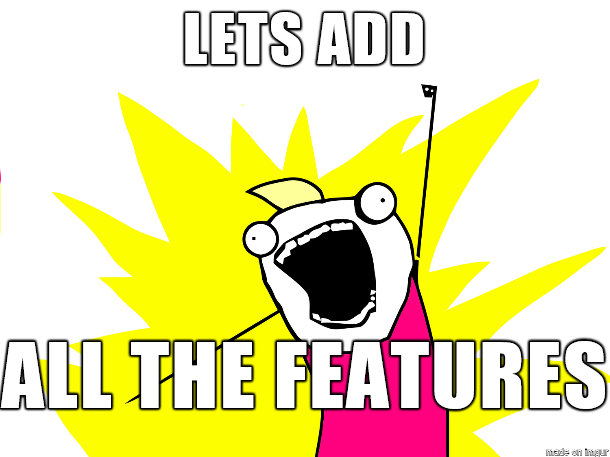


_"Feature engineering is the process of transforming raw data into features that better represent the underlying problem to the predictive models, resulting in improved model accuracy on unseen data."_

As we have seen there are some features that doesn't add much value by themselves or with the current variables, therefore it's good to create new features that describe the structures inherent in the data. We then add the following variables:

In [ ]:
def AddNewFeatures(X):    
    X['Change_ticket_Q4_Q1'] = np.where(X['Total_Ct_Chng_Q4_Q1'] == 0, 0, 
                                         X['Total_Amt_Chng_Q4_Q1']/X['Total_Ct_Chng_Q4_Q1'])
    X['Avg_Ticket'] = np.where(X['Total_Trans_Ct'] == 0, 0, 
                                         X['Total_Trans_Amt']/X['Total_Trans_Ct'])

    X['Est_RevBal_Q4_Q1'] =  X['Total_Revolving_Bal']*X['Total_Amt_Chng_Q4_Q1']
    X['Credit_Limit_per_Month'] = X['Credit_Limit']/X['Months_on_book']
    X['Credit_Limit_per_Age'] = X['Credit_Limit']/X['Customer_Age']
    X['Contacts_per_product'] = X['Contacts_Count_12_mon']/X['Total_Relationship_Count']
    return X

Let me explain why I'm trying for each of the present variables:
- Change in ticket between Q4_Q1 pretends to capture the change on the ticket size (Amount/Count), therefore if Total_Amt_Chng_Q4_Q1 > Total_Ct_Chng_Q4_Q1, it indicates a increase for the Q4 on the ticket size and so on.
- Avg_Ticket to make sense between the Amount and Count.
- Est_RevBal_Q4_Q1 as an estimate on the revolving credit present at Q4, an Amount > 1 indicates more Revolving credit at the moment and an indicator < 1 less on it.
- Credit_Limit_per_Month & Credit_Limit_per_Age, this is an experimental variable to see if there is a relationship between churn and the avg credit a user has per month/age. Maybe they don't want a big credit line and it's affecting the finacial score for other products.
- Contacts_per_product can give us a relationship between the contacts a user is doing per product, the number of contacts could be high because the user manage more products on the other hand multiple contacts being low on products could be a problem.


In [ ]:
df_exp = df.copy()
df_numeric = df_exp.select_dtypes(include = 'number').drop(columns= 'Attrition_Flag')
df_numeric = ol.transform(df_numeric)
df_exp = pd.concat([df_exp[df_exp.select_dtypes(exclude = 'number').columns.union(['Attrition_Flag'])],
           df_numeric], axis = 1)
df_exp = AddNewFeatures(df_exp)
df_exp = df_exp.dropna()

In [ ]:
exp_cols = ['Attrition_Flag','Change_ticket_Q4_Q1', 'Avg_Ticket',
            'Est_RevBal_Q4_Q1','Credit_Limit_per_Month', 'Credit_Limit_per_Age',
            'Contacts_per_product']
make_2_col_grid(df_exp[exp_cols], go.Violin, params_violin)

In [ ]:
att = df_exp[df_exp['Attrition_Flag']==1].drop(columns=['Attrition_Flag'])
n_att = df_exp[df_exp['Attrition_Flag']==0].drop(columns=['Attrition_Flag'])
make_2_col_grid(att[exp_cols[1:]], go.Box, _, n_att[exp_cols[1:]])

In [ ]:
anova = f_classif(df_exp[exp_cols].drop(columns=['Attrition_Flag']),
                  df_exp['Attrition_Flag'])
anova = pd.DataFrame(anova, 
                     columns=df_exp[exp_cols].columns[1:],
                     index = ['Predictive Power(F-score)','p-value'])\
                    .transpose().sort_values('Predictive Power(F-score)', 
                                              ascending=False)
anova['H0_Rejected'] = anova['p-value']<0.05
anova

When we visually see the different between the means of the boxes for the variables of: the change in ticket, contacts per product and est. revolved balance Q4_Q1 and with the Anova we confirm that they are variables effectively variables with a highly predictive score. Please may note that we used the a dataframe without outliers for constructing these variables as we don't want to them for the model.  

# Machine Learning Pipelines
The main purpose is to codify and automate the workflow it takes to produce a machine learning model, as you have seen we have transformed the data, add new features, remove outliers and more. Since the main idea behind data science is to experiment, as in real life a good infrastructure will ramp the number of iterations you can test. 

Most of the times in the first iteration data scientists focus on producing a model to solve a single business problem and don't invest much time in building the architecture and tend to start with a manual workflow, however once they are integrated with production this type of work doesn't fit since the speed of  the iteration cycle or there is a risk being a manual process.

That being said we can construct pipelines that help us to pre-process and train.

In [ ]:
def dropColumns(df):
    col_to_drop = ['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
                            'CLIENTNUM']
    return df.drop(columns= col_to_drop)

def catOrderEncoding(df, train, ordinal_encoder_cat=None):
    
    ordinal_cat_order = ['Education_Level',
                       'Income_Category',
                       'Card_Category']

    categories=[['Unknown','Uneducated', 'High School', 'College','Graduate','Post-Graduate', 'Doctorate'],
           ['Unknown', 'Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +'],
           ['Blue','Silver','Gold','Platinum']]
    
    temp_df = df[ordinal_cat_order]
    
    if train:
        ordinal_encoder_cat = OrdinalEncoder(categories=categories)
        ordinal_encoder_cat.fit(temp_df) 
    
    df_ordinal_encoder_cat = pd.DataFrame(columns= temp_df.columns,
                              data = ordinal_encoder_cat.transform(temp_df))
    if train:
        return df_ordinal_encoder_cat, ordinal_encoder_cat
    else:
        return df_ordinal_encoder_cat


def catAutoEncoding(df, train, ordinal_encoder_auto=None):
    ordinal_cat_auto = ['Dependent_count',
                        'Total_Relationship_Count',
                        'Months_Inactive_12_mon',
                        'Contacts_Count_12_mon']
    
    temp_df = df[ordinal_cat_auto]
    
    if train:
        ordinal_encoder_auto = OrdinalEncoder()
        ordinal_encoder_auto.fit(temp_df)
    
    df_ordinal_encoder_auto = pd.DataFrame(columns= temp_df.columns,
                              data = ordinal_encoder_auto.transform(temp_df))
    if train:
        return df_ordinal_encoder_auto, ordinal_encoder_auto
    else:
        return df_ordinal_encoder_auto

def OheEncode(df, train, ohe_encoder=None):
    label_enc_cols = ['Gender']
    temp_df = df[label_enc_cols]
    
    if train: 
        ohe_encoder = OneHotEncoder()
        if len(label_enc_cols) == 1:
            ohe_encoder.fit(temp_df.values.reshape(-1,1))  
        else:
            ohe_encoder.fit(temp_df.reshape(-1,1))
    
    df_ohe_encoder = pd.DataFrame(ohe_encoder.transform(temp_df).toarray(),
                                    columns=ohe_encoder.get_feature_names(label_enc_cols))
    
    if train:
        return df_ohe_encoder, ohe_encoder
    else:
        return df_ohe_encoder

def encodeTarget(y):
    target = y.replace({'Existing Customer': 0,
                        'Attrited Customer': 1})
    return target

def selectNumeric(df):
    numeric_cols = ['Customer_Age',
                   'Months_on_book',
                   'Credit_Limit',
                   'Total_Revolving_Bal',
                   'Avg_Open_To_Buy',
                   'Total_Amt_Chng_Q4_Q1',
                   'Total_Trans_Amt',
                   'Total_Trans_Ct',
                   'Total_Ct_Chng_Q4_Q1',
                   'Avg_Utilization_Ratio']
    return df[numeric_cols].reset_index(drop=True) 

def outlierRemoveDf(X):

    outlier_cols = ['Customer_Age', 'Months_on_book', 'Credit_Limit', 'Total_Revolving_Bal',
                   'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
                   'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

    passthrough_cols = ['Education_Level', 'Income_Category', 'Card_Category', 'Gender_F',
                       'Gender_M', 'Dependent_count', 'Total_Relationship_Count',
                       'Months_Inactive_12_mon', 'Contacts_Count_12_mon']

    numeric_pipeline = Pipeline([('outlier',OutlierRemover())])
    preprocessor = ColumnTransformer(transformers=[('numeric_pipe', numeric_pipeline, outlier_cols),
                                                   ('pass_cols', 'passthrough', passthrough_cols)])
    
    preprocessor.fit(X)
    return preprocessor

def OutlierTransform(X_train, X_test, preprocessor):
    X_train_col = X_train.columns 
    X_test_col = X_test.columns 
    X_train = pd.DataFrame(preprocessor.transform(X_train),
                           columns=X_train.columns)
    X_test = pd.DataFrame(preprocessor.transform(X_test),
                           columns=X_test.columns)
    return X_train, X_test

def AddNewFeaturesRefined(X):    
    variables = ['Dependent_count','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon']
    
    X['Change_ticket_Q4_Q1'] = np.where(X['Total_Ct_Chng_Q4_Q1'] == 0, 0, 
                                         X['Total_Amt_Chng_Q4_Q1']/X['Total_Ct_Chng_Q4_Q1'])
    X['Est_RevBal_Q4_Q1'] =  X['Total_Revolving_Bal']*X['Total_Amt_Chng_Q4_Q1']
    
    temp_df = pd.DataFrame(ordinal_encoder_auto.inverse_transform(X[variables]),
                      columns = variables)
    X['Contacts_per_product'] = temp_df['Contacts_Count_12_mon']/temp_df['Total_Relationship_Count']
    return X

def dropNa(X,y):
    temp_df = pd.concat([X,y.reset_index(drop=True)],
                  axis =1)
    temp_df = temp_df.dropna()
    y = temp_df['Attrition_Flag'].reset_index(drop=True)
    X = temp_df.drop(columns = 'Attrition_Flag').reset_index(drop=True)
    return X, y

def preProcess(df):
    # Drop initial columns
    df = dropColumns(df)
    # Split-train test
    y = df['Attrition_Flag']
    X = df.drop(columns= 'Attrition_Flag')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

def encode(X, y, ordinal_encoder_auto=None, ordinal_encoder_cat=None, ohe_encoder=None, train=True):
    # Encode Columns
    X = X.copy()
    y = y.copy()
    df_numeric = selectNumeric(X)
    
    if train:
        df_ordinal_encoder_cat, ordinal_encoder_cat = catOrderEncoding(X, train)
        df_ordinal_encoder_auto, ordinal_encoder_auto = catAutoEncoding(X, train)
        df_ohe_encoder, ohe_encoder = OheEncode(X, train)
    else:
        df_ordinal_encoder_auto = catAutoEncoding(X, train, ordinal_encoder_auto)
        df_ordinal_encoder_cat = catOrderEncoding(X, train, ordinal_encoder_cat)
        df_ohe_encoder = OheEncode(X, train, ohe_encoder)
        
    X = pd.concat([df_numeric,
                   df_ordinal_encoder_cat,
                   df_ordinal_encoder_auto,
                   df_ohe_encoder], axis = 1)
    
    y = encodeTarget(y)
    
    if train:
        return X, y, ordinal_encoder_auto, ordinal_encoder_cat, ohe_encoder
    else:
        return X, y

In [ ]:
df = pd.read_csv('/kaggle/input/credit-card-customers/BankChurners.csv')
X_train, X_test, y_train, y_test = preProcess(df)
X_train, y_train, ordinal_encoder_auto, ordinal_encoder_cat, ohe_encoder = encode(X_train, y_train)
X_test, y_test = encode(X_test, y_test, ordinal_encoder_auto, ordinal_encoder_cat, ohe_encoder, False)
preprocessor = outlierRemoveDf(X_train)
X_train, X_test = OutlierTransform(X_train, X_test, preprocessor)
X_train, y_train = dropNa(X_train, y_train)
X_test, y_test = dropNa(X_test, y_test)
X_train = AddNewFeaturesRefined(X_train)
X_test = AddNewFeaturesRefined(X_test)

----- Work in progress ----

We loaded again the dataframe, and we preprocess as the following:
- Drop the columns \[ClientNum, Naive_Bayes from the beginning]
- Split between X_train, X_test, y_train, y_test
- Encode all the variables 
- Identify outliers
- Remove outliers
- Drop new NaN identified from outliers
- Add new features

Please may note that we fit on the initial training set and with that fit we are transforming X_train and also X_test.

In [ ]:
def modelGrid(X, Y, vainilla=False):
    numeric_cols = ['Customer_Age','Months_on_book','Credit_Limit',
                   'Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1',
                   'Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1',
                   'Avg_Utilization_Ratio','Change_ticket_Q4_Q1',
                    'Est_RevBal_Q4_Q1','Contacts_per_product']
    if vainilla:
        numeric_cols = numeric_cols[:-3]
    
    
    passthrough_cols = ['Education_Level', 'Income_Category', 'Card_Category', 'Gender_F',
                       'Gender_M', 'Dependent_count', 'Total_Relationship_Count',
                       'Months_Inactive_12_mon', 'Contacts_Count_12_mon']
    
    #Random forest model
    rf_params ={'classifier__min_samples_split':[50,75,100,250],
               'classifier__max_depth':[*range(3,11)]}
    rf_model = RandomForestClassifier()
    
    oversample=SMOTE(random_state=0)
    
    numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
    scaler = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_cols),
                                             ('pass', 'passthrough', passthrough_cols)])
    
    clf = ImbPipe(steps=[('scaler', scaler),
                         ('oversampling', SMOTE()),
                          ('classifier', rf_model)])
    
    if vainilla:
        clf = ImbPipe(steps=[('scaler', scaler),
                          ('classifier', rf_model)])
    
    n_folds = 5
    scoring = ['f1','recall', 'precision']
    gscv = GridSearchCV(clf, param_grid=rf_params, scoring=scoring, n_jobs=-1, cv=n_folds, refit='f1')
    gscv.fit(X, Y)
    
    return gscv

We use Gridsearch for find the best params for the RF, within the Gridsearch we use a CrossValidation this will help us to avoid overfitting.
Also we optimized according to F1, combination of Recall and Precision since we don't have enough context of what is better and the for the company and what would cost any action related to churn customers. 

In [ ]:
rf_model = modelGrid(X_train, y_train)
results = pd.DataFrame(rf_model.cv_results_)
print(results.shape)
best_results = results[(results['rank_test_f1'] <= 5) | 
                       (results['rank_test_recall'] <= 5) | 
                       (results['rank_test_precision'] <= 5)]
best_results

In [ ]:
def confMatrix(model, X, y):
    '''
    Visualize a confusion matrix with the best parameters and CV score for the model
   
    Parameters
    ----------
    model : Sklearn trained model
        The model already fitted
    
    Returns
    -------
    None

    '''
    from sklearn.metrics import confusion_matrix
    print("Best parameter (CV score=%0.3f):" % model.best_score_)
    print(model.best_params_)
    #Generate predictions with the model using our X values
    y_pred = model.predict(X)
    cm = confusion_matrix(y, y_pred)
    #Get the confusion matrix
    sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')


In [ ]:
confMatrix(rf_model, X_train, y_train)

In [ ]:
confMatrix(rf_model, X_test, y_test)

In [ ]:
y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

print('Train:')
print(f'F1Score: {f1_score(y_train, y_pred_train):.2%}')
print(f'Recall: {recall_score(y_train, y_pred_train):.2%}')
print(f'Precision: {precision_score(y_train, y_pred_train):.2%}')

print('\n Test:')
print(f'F1Score: {f1_score(y_test, y_pred_test):.2%}')
print(f'Recall: {recall_score(y_test, y_pred_test):.2%}')
print(f'Precision: {precision_score(y_test, y_pred_test):.2%}')

In [ ]:
X_train, X_test, y_train, y_test = preProcess(df)
X_train, y_train, ordinal_encoder_auto, ordinal_encoder_cat, ohe_encoder = encode(X_train, y_train)
X_test, y_test = encode(X_test, y_test, ordinal_encoder_auto, ordinal_encoder_cat, ohe_encoder, False)

In [ ]:
rf_model_vainilla = modelGrid(X_train, y_train, True)
results_vainilla = pd.DataFrame(rf_model_vainilla.cv_results_)
print(results_vainilla.shape)
best_results_vainilla = results_vainilla[(results_vainilla['rank_test_f1'] <= 5) | 
                       (results_vainilla['rank_test_recall'] <= 5) | 
                       (results_vainilla['rank_test_precision'] <= 5)]
best_results_vainilla

In [ ]:
y_pred_train = rf_model_vainilla.predict(X_train)
y_pred_test = rf_model_vainilla.predict(X_test)

print('Train:')
print(f'F1Score: {f1_score(y_train, y_pred_train):.2%}')
print(f'Recall: {recall_score(y_train, y_pred_train):.2%}')
print(f'Precision: {precision_score(y_train, y_pred_train):.2%}')

print('\n Test:')
print(f'F1Score: {f1_score(y_test, y_pred_test):.2%}')
print(f'Recall: {recall_score(y_test, y_pred_test):.2%}')
print(f'Precision: {precision_score(y_test, y_pred_test):.2%}')